<a href="https://colab.research.google.com/github/adamuas/intuitive_intro_to_ann_ml/blob/master/Section_1_Implement_your_own_neuron_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An Intuitive Introduction to Artificial Neural Networks and Machine Learning


This notebook walks you through the implementation of a neuron, its activation function (i.e. a function to model the excitation stage of the neuron) and its output function (i.e. a function to model the firing stage of the neuron).



In [0]:
# First off lets start by importing some useful python packages
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits, load_diabetes
from matplotlib import pylab as plt


# install tensorflow 2
import tensorflow as tf

%matplotlib inline

In [2]:
print('tensorflow version:{}'.format(tf.__version__))

tensorflow version:2.0.0-dev20190511


## Section 1 - Implementing your own neuron

### Section 1.1 - The Neuron

In [0]:
class Neuron:
    """
    A model of our artificla neuron.
    """
    
    def __init__(self, n_inputs, bias=1.0, activation_fn=None, output_fn=None):
        """
        Constructor for our neuron
        
        params:
          n_inputs - number of input connections/weights
          bias - bias of the neuron
          activation_fn - activation function that models excitation
        
        """
        # randomly initialize the weights (1 weight for each input)
        # Weights are supposed to represent the connection strength of the dendrites of our neuron.
        self.weights = np.random.randn(n_inputs)
        # bias of the neuron 
        self.bias = bias
        # number of inputs the neuron recevies
        self.n_inputs = n_inputs
        # activation function of the neuron
        self.activation_fn = activation_fn 
        # output function of the neuron
        self.output_fn = output_fn 
    
    def stimulate(self, inputs, verbose=False):
        """
        Propagates the inputs through the weights and returns the output of the neuron
        
        params:
        inputs - inputs signals for the neuron
        
        returns:
        output value - output signal of the neuron
        """
        
        
        # initialize our output value
        output_value= 0
        action_potential = 0
        
        # pass through activation function
        if self.activation_fn:
              action_potential  = self.activation_fn(weights=self.weights, 
                                                     inputs=inputs)
        # add neuron's bias
        action_potential = action_potential + self.bias
            
        if verbose:
            print('Action Potential: {}'.format(action_potential))
        
        if self.output_fn:
              output_value = self.output_fn(action_potential=action_potential)
           
        if verbose:
            print('Output Value: {}'.format(output_value))
        
        return output_value
      
    def __repr__(self):
        """
        Returns a string representation of our Artificial Neuron
        
        returns:
          String
        """
        return "<neuron>\nweights: {}\nbias: {}\nactivation_fn: {}\noutput_fn:{}\n</neuron>".format(self.weights,
                                                                                                    self.bias,
                                                                                                    self.activation_fn,
                                                                                                    self.output_fn)
            

### Section 1.2 - Activation Function (Model's activation)



In [0]:
def weighted_sum(weights,inputs):
  """ 
  Weighted sum activation function
  
  This is supposed to model the action excitation stage of the artificial neuron.
  It models how excited the neuron should be based on the inputs (stimulus)
  
  parameters:
    W - Weights (Weights of the neuron)
    I - inputs (features used to make the decision)
    
  returns:
    action_potentatial - the degree of activation for that particular neuron
  
  """
  
  action_potential =  0
        
  for input_i, weight_i in zip(inputs, weights):
            action_potential += input_i * weight_i
      
  return action_potential


**Things to think about:**


*   Why use weighted sum?



### Section 1.2 - Output Function  (Model's firing stage)

In [0]:
def sigmoid(action_potential):
  """ 
  Sigmoid output function
  
  This is supposed to model the firing stage of the neuron.
  It models how much the neuron should output based on the action potential 
  generated from the excitation stage.
  
  return:
    returns the output value of the neuron
  
  """
  return 1/(1 + np.exp(-1 * (action_potential)))

**Things to think about**:


*   Why a sigmoid activation function?



#### Behaviour of Sigmoids

In [23]:
X = range(15)
y = [sigmoid(x) for x in X]

df = pd.DataFrame.from_dict({'X': X, 'y':y})
df.head()

,X,y
0,0,0.500000
1,1,0.731059
2,2,0.880797
3,3,0.952574
4,4,0.982014


Text(0.5, 1.0, 'Behaviour Of Sigmoids')

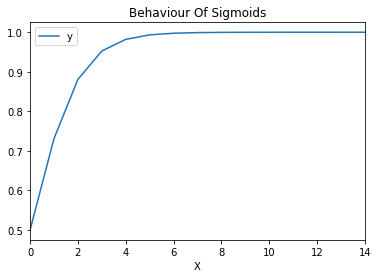

In [25]:
df.plot(x='X',y='y')
plt.title('Behaviour Of Sigmoids')

The Sigmoid output function allows us to squash the output values of neuron's while preserving their magnitudes. So with greater output values we get closer and closer to 1.0,and with smaller and smaller output values we get closer to 0.0

## (5) Stimulate Our Neuron 

We will be stimulating our neuron with the Iris dataset. It is a simple dataset that has measures of the iris plant such as the petal length, and width along with the corresponding species of the iris plant. It is a gentle introduction to simple datasets.

### 5.1 - Load the Iris Dataset from Sklearn

In [6]:
# lets import the iris dataset.
from sklearn.datasets import load_iris

# load the iris dataset
data = load_iris()

print(data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### 5.2 - Create our Neuron

Here we will specify the number of input features as the number of attributes we have available in the Iris dataset because we will like to use those attributes to make predictions about the Iris plant.

In [32]:
# specify the number of inputs features we want the neruon to consider 
IRIS_FEATURES = 4
neuron = Neuron(n_inputs=IRIS_FEATURES, activation_fn=weighted_sum, output_fn=sigmoid)
print(neuron)

<neuron>
weights: [ 0.38850322  1.78214967 -0.17622473  0.45422982]
bias: 1.0
activation_fn: <function weighted_sum at 0x7fcfdce1e9d8>
output_fn:<function sigmoid at 0x7fcfd9ffb158>
</neuron>


### 5.3 - Stimulate the neuron with the iris Dataset
Here we will use a few samples of the iris dataset to stimulate the neuron.

In [33]:
inputs = data['data']
targets = data['target']

num_samples = 5

for i in range(num_samples):
  input_i = inputs[i]
  target_i = targets[i]
  print('input: {}'.format(input_i))
  output_i = neuron.stimulate(input_i)
  print('output: {}'.format(output_i))

input: [5.1 3.5 1.4 0.2]
output: 0.9998841410983309
input: [4.9 3.  1.4 0.2]
output: 0.9996948024762491
input: [4.7 3.2 1.3 0.2]
output: 0.999773059991801
input: [4.6 3.1 1.5 0.2]
output: 0.9997079483096082
input: [5.  3.6 1.4 0.2]
output: 0.999899211575451


### 5.4 0 Sanity Check 

Here we are going to make sure our little neuron is behaving properly. So lets make some assertions about the output its producting.


***(1) Check if the weights are within the sigmoids output range of [0..1]*** 


In [0]:
def test_output_range(neuron, data):
  """ 
  Tests if the neuron is outputing within the range of the assigned output for sigmoids
  params:
    neruon - the neruon instance
    data - dictionary that follows sklearns dataset format (see sklearn)
   
  returns:
    True - if test passed
    False - otherwise
    
  """
  
  inputs = data['data']
  targets = data['target']

  num_samples = len(targets)

  for i in range(num_samples):
    input_i = inputs[i]
    target_i = targets[i]
    output_i = neuron.stimulate(input_i)
    assert (output_i >= 0.0) and (output_i <=1.0)
  
  return True
  
  

In [35]:
test_output_range(neuron, data)

True